In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [ ]:
train_data = datasets.FashionMNIST(root='data', train= True, download = True, transform = ToTensor(), target_transform= None )
test_data = datasets.FashionMNIST(root='data', train= False, download = True, transform = ToTensor(), target_transform= None )

100%|██████████| 26421880/26421880 [00:06<00:00, 4326289.84it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 303775.47it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4943684.17it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13930501.29it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]

In [ ]:
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes

In [ ]:
class_to_idx = train_data.class_to_idx

In [ ]:
image.shape , label

(torch.Size([1, 28, 28]), 9)

In [ ]:
print(f"Image shape: {image.shape} -> [color_channels, height, widht]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, widht]
Image label: Ankle boot


In [ ]:
###1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

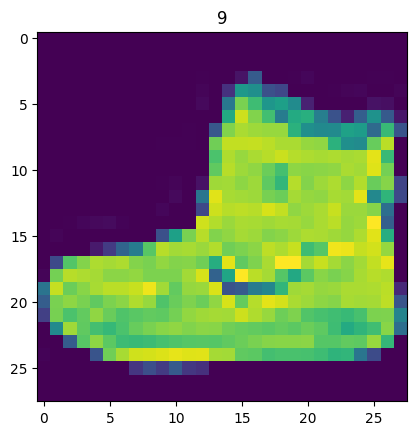

In [ ]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")

plt.imshow(image.squeeze())
plt.title(label)
#

(-0.5, 27.5, 27.5, -0.5)

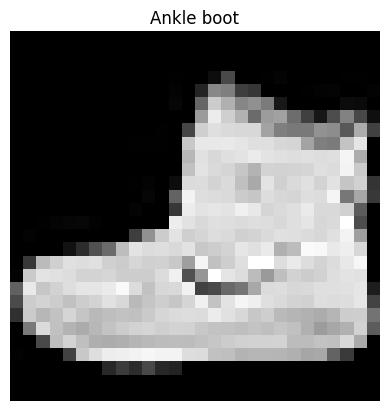

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

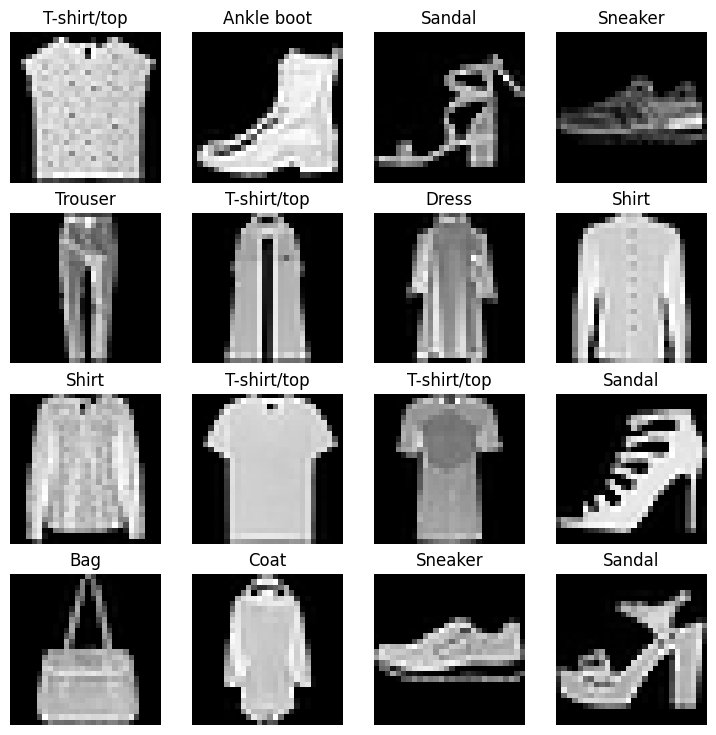

In [ ]:
## PLot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=([1])).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
##2. Prepare Data Loader

In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
#Setup the batch size hyperparameter

BATCH_SIZE = 32

#Turn datasets into iterables(bathces)
train_dataloader = DataLoader(dataset= train_data, batch_size = BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cdad1554c70>,
 <torch.utils.data.dataloader.DataLoader at 0x7cdad1587790>)

In [ ]:
# Lets check out what we ve created

print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7cdad1554c70>, <torch.utils.data.dataloader.DataLoader object at 0x7cdad1587790>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [ ]:
# Check out what s inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 5, label size: torch.Size([])


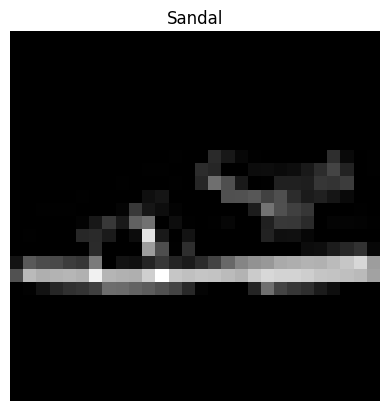

In [ ]:
# SHow a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [ ]:
## Model 0: Build a baseline model.
#A baseline model is a simple model you will try and imporve upon with subsequent models/experiments.

In [ ]:
# Create a flatten layer

In [ ]:
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample

output = flatten_model(x)

# Print what happend

print(f"shape before flattening: {x.shape}")
print(f"shape after flattening: {output.shape}")

shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape = int,
               hidden_units= int,
               output_shape= int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape, out_features = hidden_units),
        nn.Linear(in_features=hidden_units, out_features= output_shape)
    )

  def forward(self, x):
    return(self.layer_stack(x))

In [ ]:
torch.manual_seed(42)

#Setup model with input parameters
model_0=FashionMNISTModelV0(input_shape = 784,
                            hidden_units = 10,
                            output_shape = len(class_names))

model_0.to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [ ]:
## 3.1 Setup loss, optimizer and evaluation metrics

In [ ]:
##Loss function - since we are working with multi-class data, our loss function will be nn.CrossEntropyLoss()

In [ ]:
## Optimizer - our otimizer torch.optim.SGD()
# Evaluation metric - since we are working on a classification problem lets use accuracy as our evaluation metric.

In [ ]:
import requests
from pathlib import Path
## Wowload helper function from pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# Import accuracy metric

from helper_functions import accuracy_fn

# Setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.1)

In [ ]:
## 3.2 Creating a function to time our experiments

##Machine learning is very experimantal

#Two of the main things you ll often want to track are
#1. Models performance
#2. How fast it runs

In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float,
                      end: float,
                      device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3F} seconds")
  return total_time

In [ ]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 seconds


5.097199999681834e-05

In [ ]:
## 3.3 Creating a training loop and trainig a model on batches of data

In [ ]:
# 1. Loop through epochs.
#2. Loop through training batches, perform training steps, calculate the train loss
# 3 . Loo through testing batches, perform testing steps, calculates the tess loss
#4. Print out whats happening
#5. Time it all


In [ ]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer

torch.manual_seed(42)
train_time_start_on_cpu= timer()

#Set the number of epochs
epochs = 3

# Create training and test loop

for epochs in tqdm(range(epochs)):
  print(f'Epochs: {epochs}\n-----')
  ### Training
  train_loss = 0
  # Add a loop to loop throigh the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    #1 Forwared pass
    y_pred = model_0(X)

    #2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    #3. Optmizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optmizer step
    optimizer.step()

    # Print out what happening

    if batch % 400 == 0:

      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

# Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing loop

  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      #1. Forward pass
      test_pred= model_0(X_test)

      #2. Calculate loss(accumalatively)
      test_loss += loss_fn(test_pred, y_test)

      #3. Calculate accuracy
      test_acc+= accuracy_fn(y_true = y_test, y_pred=test_pred.argmax(dim=1))

    #Calculate test lodd avergae per batch

    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch

    test_acc/= len(test_dataloader)

  # Print what happening
  print(f" \nTrain loss :{ train_loss: .4f} | Test loss: {test_loss: .4f}, Test acc: {test_acc:.4f}")

# Calculate training time

train_time_end_on_cpu = timer()

total_train_time_model_0= print_train_time(start= train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
 
Train loss : 0.5904 | Test loss:  0.5095, Test acc: 82.0387
Epochs: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
 
Train loss : 0.4763 | Test loss:  0.4799, Test acc: 83.1969
Epochs: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
 
Train loss : 0.4550 | Test loss:  0.4766, Test acc: 83.4265
Train time on cpu: 36.034 seconds


In [ ]:
# 4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # make predictions
      y_pred = model(X)
      # Accumulate the loss and acc values per batch

      loss+= loss_fn(y_pred, y)
      acc+= accuracy_fn(y_true=y,
                        y_pred = y_pred.argmax(dim=1))

    #Scale loss and acc to find the avergate loss/acc per batch
    loss /= len(data_loader)

    acc/= len(data_loader)

  return{"model_name": model.__class__.__name__, # only works when model was created with a class
         "model_loss": loss.item(),
         "model_acc": acc}

# calculate model 0 results on test dataset

model_0_results = eval_model(model=model_0,
                             data_loader= test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
## 5. Setup device agnostic-code (for using a GPU if there is one)

In [ ]:
torch.cuda.is_available()

False

In [ ]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

In [ ]:
## Model 1: Building a better model with non linearity

# Create a model with non linear and linear layers

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape :int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                out_features=output_shape),
        nn.ReLU()
    )
  def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
#Create an instance of model 1

torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units =10,
                              output_shape=len(class_names)).to(device)

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Setup loss, optimizer and evaluation metrics
# Import accuracy metric

from helper_functions import accuracy_fn

# Setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.1)

In [ ]:
# Functionizing training and evaluation/testing loops

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc =0, 0

  #Put the model into training mode
  model.train()
  model.to(device)
  # Add a loop to loop throigh the training batches
  for batch, (X,y) in enumerate(data_loader):
    #Put data on target device
    X, y = X.to(device), y.to(device)
    #1 Forwared pass
    y_pred = model(X)

    #2. Calculate the loss and accuracy per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true = y,
                             y_pred = y_pred.argmax(dim=1)) # go from logits to predictions labels

    #3. Optmizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optmizer step
    optimizer.step()

# Divide total train loss and accuracy by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc:{train_acc:.2f}%")

In [ ]:
# Functionizing testing loop

In [ ]:
def test_step(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
  """Performs a training with model trying to learn on data_loader."""
  test_loss, test_acc = 0, 0
  #Put the model into testing mode
  model.eval()
  #Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      #Put data on target device
      X, y = X.to(device), y.to(device)
      #1. Forward pass (outputs raw logits)
      test_pred= model(X)

      #2. Calculate loss(accumalatively)
      test_loss += loss_fn(test_pred, y)

      #3. Calculate accuracy
      test_acc+= accuracy_fn(y_true = y,
                             y_pred=test_pred.argmax(dim=1)) # go from logits to prediciton labels

    #Calculate test loss average per batch

    test_loss /= len(data_loader)

    # Calculate the test acc average per batch

    test_acc /= len(data_loader)

  # Print what happening
  print(f" \nTest loss :{ test_loss: .5f} | Test acc: {test_acc:.4f}")

In [ ]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_device= timer()

#Set the number of epochs
epochs = 3

# Create training and test loop
for epochs in tqdm(range(epochs)):
  print(f'Epochs: {epochs}\n-----')
  train_step(data_loader = train_dataloader,
             model= model_1,
             loss_fn= loss_fn,
             optimizer= optimizer,
             accuracy_fn = accuracy_fn,
             device=device)
  test_step(model= model_1,
            data_loader = train_dataloader,
            loss_fn= loss_fn,
            accuracy_fn = accuracy_fn,
            device=device)

# Calculate training time

train_time_end_on_device = timer()

total_train_time_model_1= print_train_time(start= train_time_start_on_device,
                                            end = train_time_end_on_device,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
-----
Train loss: 1.09199 | Train acc:61.34%
 
Test loss : 0.92727 | Test acc: 66.0050
Epochs: 1
-----
Train loss: 0.73779 | Train acc:73.69%
 
Test loss : 0.68793 | Test acc: 75.4267
Epochs: 2
-----
Train loss: 0.66776 | Train acc:76.08%
 
Test loss : 0.64329 | Test acc: 76.8717
Train time on cpu: 57.253 seconds


In [ ]:
device

'cpu'

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  loss, acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      #Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # make predictions
      y_pred = model(X)
      # Accumulate the loss and acc values per batch

      loss+= loss_fn(y_pred, y)
      acc+= accuracy_fn(y_true=y,
                        y_pred = y_pred.argmax(dim=1))

    #Scale loss and acc to find the avergate loss/acc per batch
    loss /= len(data_loader)

    acc/= len(data_loader)

  return{"model_name": model.__class__.__name__, # only works when model was created with a class
         "model_loss": loss.item(),
         "model_acc": acc}


In [ ]:
# Get model 1 results dictionary

model_1_results = eval_model(model=model_1,
                             data_loader = test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6874349117279053,
 'model_acc': 75.65894568690096}

In [ ]:
## Model 2: Building a Concolutional Neural Network

In [ ]:
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.

  """

  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size =3,
                  stride=1,
                  padding=1), # Values we can set ourselves in our NNs are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there is a trick to calculating this ...
                  out_features=output_shape)
    )

  def forward(self,x):
    x=self.conv_block_1(x)
    #print(f"Output shape of con_block_1:{x.shape}")
    x=self.conv_block_2(x)
    #print(f"Output shape of con_block_2:{x.shape}")
    x=self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x



In [ ]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

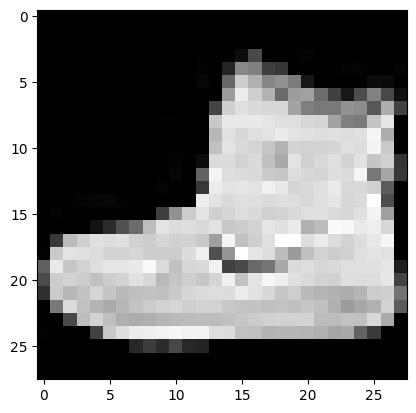

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

In [ ]:
### 7.1 Stepping through nn.Conv2d

In [ ]:
torch.manual_seed(42)

# Create a batch of images

images = torch.randn(size=(32,3,64,64))

test_image = images[0]

print(f"Image batch shape: {image.shape}")
print(f"Single image_shape: {test_image.shape}")
print(f"Test image: \n {test_image}")

Image batch shape: torch.Size([1, 28, 28])
Single image_shape: torch.Size([3, 64, 64])
Test image: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.79

In [ ]:
torch.manual_seed(42)
# Create a single a Conv2d layer

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels = 10,
                       kernel_size = 3,
                       stride=1,
                       padding=0)

# Pass the data through the CNN layer

conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [ ]:
### 7.2 Stepping through nn.MaxPool2d

# Print out original image shape without unsqueezed dimension

print(f"Test image orfiginal shape: {test_image.shape}")

# Create a sample nn.MaxPool2d layer

max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image)

print(f"Shape after going through conv_layer: {test_image_through_conv.shape}")

#Pass data through the maxpool layer

test_image_through_conv_and_max_pool= max_pool_layer(test_image_through_conv)

print(f"Shape after going through conv_layer and max_pool_layer: {test_image_through_conv_and_max_pool.shape}")

Test image orfiginal shape: torch.Size([3, 64, 64])
Shape after going through conv_layer: torch.Size([10, 62, 62])
Shape after going through conv_layer and max_pool_layer: torch.Size([10, 31, 31])


In [ ]:
torch.manual_seed(42)

In [ ]:
# Create a random tensor with a similar number of dimensions to our images

random_tensor = torch.randn(size =(1,1,2,2))

#Create a max pool layer

max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)

max_pool_tensor

tensor([[[[0.3367]]]])

In [ ]:
### 7.3 Setup a loss function and optimizer for model_2

from helper_functions import accuracy_fn
loos_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)



In [ ]:
## 7.4 Training
# import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_of_model_2= timer()

#Set the number of epochs
epochs = 3

# Create training and test loop
for epochs in tqdm(range(epochs)):
  print(f'Epochs: {epochs}\n-----')
  train_step(data_loader = train_dataloader,
             model= model_2,
             loss_fn= loss_fn,
             optimizer= optimizer,
             accuracy_fn = accuracy_fn,
             device=device)
  test_step(model= model_2,
            data_loader = train_dataloader,
            loss_fn= loss_fn,
            accuracy_fn = accuracy_fn,
            device=device)

# Calculate training time

train_time_end_of_model_2 = timer()

total_train_time_model_2= print_train_time(start= train_time_start_of_model_2,
                                            end = train_time_end_of_model_2,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
-----
Train loss: 0.59518 | Train acc:78.38%
 
Test loss : 0.37069 | Test acc: 86.7767
Epochs: 1
-----
Train loss: 0.36421 | Train acc:86.86%
 
Test loss : 0.36101 | Test acc: 87.5483
Epochs: 2
-----
Train loss: 0.32472 | Train acc:88.31%
 
Test loss : 0.31951 | Test acc: 88.6533
Train time on cpu: 246.454 seconds


In [ ]:
# Get model 2 results dictionary

model_2_results = eval_model(model=model_2,
                             data_loader = test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34938228130340576,
 'model_acc': 87.46006389776358}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
## 8. Compare model results and training time

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.687435,75.658946
2,FashionMNISTModelV2,0.349382,87.460064


In [ ]:
## Add training time to results comparison

compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,36.033509
1,FashionMNISTModelV1,0.687435,75.658946,57.253050
2,FashionMNISTModelV2,0.349382,87.460064,246.454172


Text(0, 0.5, 'model')

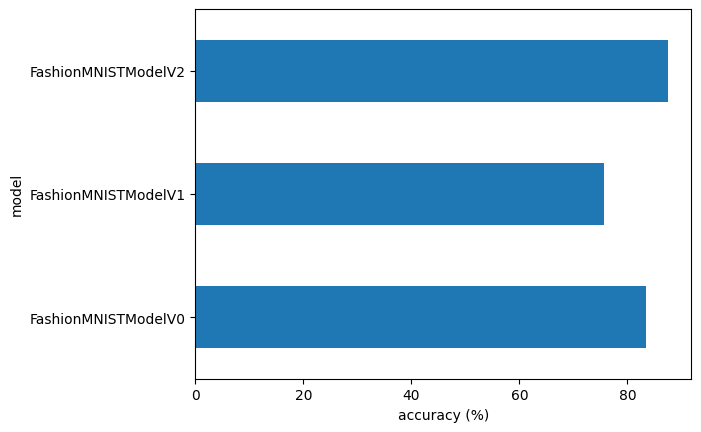

In [ ]:
# Visualize our model results

compare_results.set_index("model_name")["model_acc"].plot(kind="barh")

plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [ ]:
## 9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #Prepare the sample
      sample = torch.unsqueeze(sample,dim=0).to(device)

      #Forware pass model outputs raw logits
      pred_logit = model(sample)

      #Get prediciton
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

      #Get pred prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  #Sstack the pred prob to turn list into a tensor

  return torch.stack(pred_probs)

In [ ]:
import random
#random.seed(42)
test_samples= []
test_labels = []

for sample, label in random.sample(list(test_data), k =9):
  test_samples.append(sample)
  test_labels.append(label)

#View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Dress')

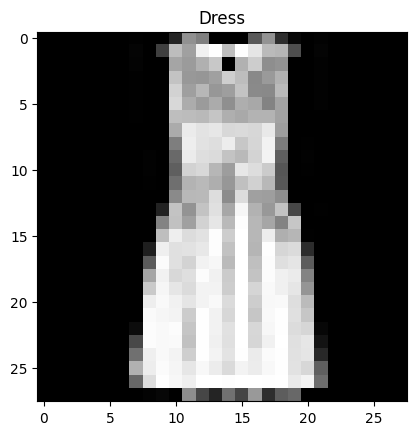

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
#make_predictions

pred_probs = make_predictions(model=model_2,
                              data=test_samples)

#View first two predictions probabilities
pred_probs[:2]

tensor([[4.3073e-03, 2.0004e-04, 1.9799e-05, 9.9389e-01, 6.9660e-05, 6.3457e-06,
         9.4937e-04, 1.9043e-04, 3.3416e-04, 3.0761e-05],
        [7.2678e-06, 9.9346e-01, 2.0445e-07, 6.4768e-03, 1.2676e-05, 1.0693e-06,
         6.1950e-06, 2.6275e-06, 2.7214e-05, 2.4541e-06]])

In [ ]:
test_labels

[3, 1, 7, 8, 0, 6, 3, 4, 0]

In [ ]:
# Conver pred probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([3, 1, 7, 8, 0, 6, 3, 4, 0])

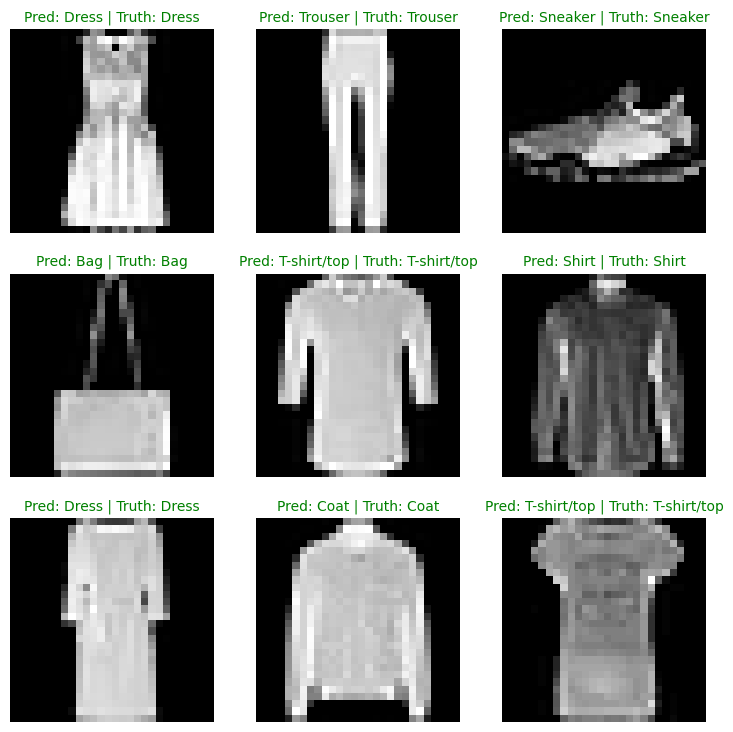

In [ ]:
# PLot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols=3

for i, sample in enumerate(test_samples):
  #Create subplot
  plt.subplot(nrows, ncols, i+1)

  #Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  #Find the prediction in text form
  pred_label=class_names[pred_classes[i]]

  #Get the truth label in text form ]
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  #Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")

  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

In [ ]:
# 10. Making a confusion matrix for further visualization

In [ ]:
import mlxtend
mlxtend.__version__

'0.22.0'

In [ ]:
from tqdm.auto import tqdm

#1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "Makinge predictions"):
    X, y = X.to(device), y.to(device)
    y_logit=model_2(X)

    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())


#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Makinge predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 2])

In [ ]:
!pip install torchmetrics
import torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 4.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import mlxtend
mlxtend.__version__

'0.22.0'

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
#2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

confmat_tensor

tensor([[549,   5,  43,  65,  16,   1, 314,   0,   7,   0],
        [  6, 886,   7,  83,  10,   0,   5,   0,   3,   0],
        [  8,   3, 798,  10, 123,   0,  51,   0,   7,   0],
        [ 21,  13,  26, 825,  66,   0,  38,   0,  10,   1],
        [  1,   4, 125,  33, 786,   0,  42,   0,   9,   0],
        [  3,   3,   3,   9,   0, 772,   2,  96,  85,  27],
        [ 59,   5, 148,  44, 180,   0, 552,   0,  12,   0],
        [  1,   0,   0,   0,   0,  19,   0, 942,   7,  31],
        [ 10,   2,  35,  11,  27,   5,  14,   8, 887,   1],
        [  1,   0,   4,   1,   0,  23,   1, 104,  11, 855]])

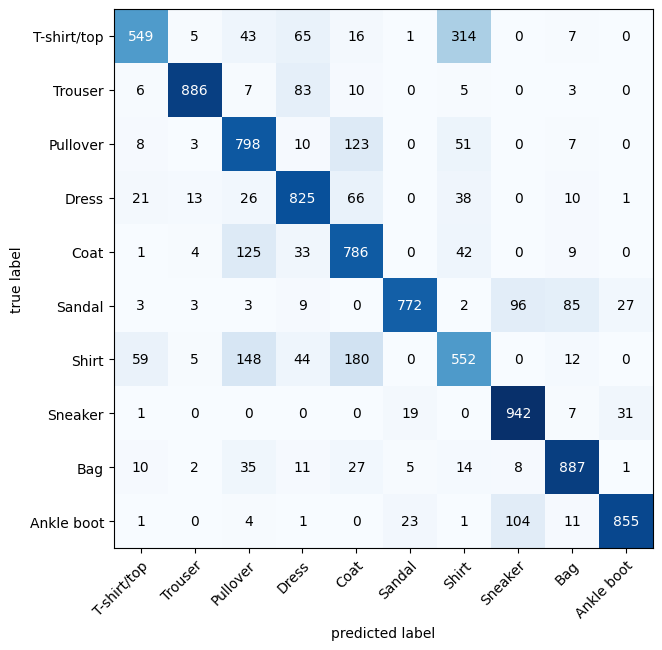

In [ ]:
#3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib likes working wit numpy
    class_names = class_names,
    figsize=(10,7)
)

In [ ]:
#11. Save and load the trained model

from pathlib import Path

#Create model directory path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

#Create model save
MODEL_NAME = "Pytorch computer vision model 2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj= model_2.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/Pytorch computer vision model 2.pth


In [ ]:
#Create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units = 10,
                                     output_shape=len(class_names))


#Load in the save state_dict()

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#Send the model to the target device

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluate loaded model

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34938228130340576,
 'model_acc': 87.46006389776358}

In [ ]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(model = loaded_model_2,
                                    data_loader= test_dataloader,
                                    loss_fn = loss_fn,
                                    accuracy_fn = accuracy_fn,
)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34938228130340576,
 'model_acc': 87.46006389776358}

In [ ]:
#Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              )

tensor(True)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 3.4499e-01,  3.9632e-01, -4.6718e-01],
                        [ 1.4581e-01,  2.5146e-01,  4.8888e-02],
                        [-4.4625e-01,  1.3540e-02,  2.2378e-01]]],
              
              
                      [[[-4.7943e-01,  5.2994e-01, -8.9149e-02],
                        [ 2.2647e-01,  4.5428e-01,  9.9778e-02],
                        [-2.4341e-01,  2.2578e-01,  1.0258e-01]]],
              
              
                      [[[-3.9372e-01, -7.5386e-02, -2.5212e-02],
                        [-6.3204e-01, -6.6724e-01,  2.0643e-01],
                        [-7.9207e-01, -6.1475e-01, -1.0216e-01]]],
              
              
                      [[[-7.9835e-01, -8.9218e-01, -6.7539e-01],
                        [ 2.2395e-01, -6.5609e-01,  1.5425e-01],
                        [ 1.5879e-01, -6.4099e-02,  3.5904e-01]]],
              
              
                      [[[-1.0685e-01,  2.7142e-01, -1